# 03-02 : Central Tendency

reference: [Lecture 2: Central tendency](https://learn.london.ac.uk/mod/page/view.php?id=111238&forceview=1)

In [1]:
import pandas as pd
import numpy as np
from typing import Dict, List
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt

## Data Collection

### Functions

In [2]:
def load_survey_data(file_path:str) -> pd.DataFrame:
    """Load the data gathered via Survey"""
    # read the dataset
    df_result = pd.read_excel(
        io=file_path,
        usecols=[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18])

    # assign column names
    df_result.columns = [
        'id',
        'occupation',
        'gender',
        'age',
        'education',
        'marital_status',
        'provider',
        'customer_years',
        'customer_type',
        'preferred_channel',
        'satisfaction_overall',
        'used_ai',
        'satisfaction_ai',
        'effective_ai',
        'review_date'
    ]

    return df_result

### Data Load

In [3]:
df_survey = load_survey_data('../../data/raw/results-for-telecommunica-2023-08-08-0844.xlsx')

# show the first 3 rows
print(df_survey.shape)
display(df_survey.head(3))

(40, 15)


,id,occupation,gender,age,education,marital_status,provider,customer_years,customer_type,preferred_channel,satisfaction_overall,used_ai,satisfaction_ai,effective_ai,review_date
0,1058192-1058174-111830520,Employed,Male,35-44 years,Bachelor Degree,Married or domestic partnership,Vodacom,More than 5 years,Contract,Phone,5,Yes,3.0,Agree,01/01/2023
1,1058192-1058174-111884750,Employed,Female,35-44 years,Masters Degree/MBA or similar,Married or domestic partnership,Vodacom,More than 5 years,Hybrid,Phone,4,Yes,3.0,Neutral,16/06/2022
2,1058192-1058174-111894339,Employed,Male,45-54 years,Bachelor Degree,Divorced,Other,2-5 years,Contract,In-person,5,Yes,1.0,Disagree,15/05/2023


## Pre-processing

### Data Types

#### Set Nominal Values

In [4]:
def set_category(dataframe:pd.DataFrame, column_name:str) -> None:
    """Set the specified column to be a category type."""
    dataframe[column_name] = dataframe[column_name].astype('category')

In [5]:
def set_categorical_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Set the datatype for all categorical columns"""
    df_result = dataframe.copy()

    set_category(df_result, 'occupation')
    set_category(df_result, 'gender')
    set_category(df_result, 'marital_status')
    set_category(df_result, 'provider')
    set_category(df_result, 'customer_type')
    set_category(df_result, 'preferred_channel')

    return df_result

In [6]:
df_survey = set_categorical_columns(df_survey)

#### Set Ordinal Values

In [7]:
def set_ordinal(dataframe:pd.DataFrame, column_name:str, categories:List[str]) -> None:
    """Set the specified column to be a ordered category type."""
    dataframe[column_name] = dataframe[column_name].astype(
        pd.CategoricalDtype(categories=categories, ordered=True))

In [8]:
def set_ordinal_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Set the datatype for all ordinal columns"""
    df_result = dataframe.copy()

    # What is your age? 
    set_ordinal(df_result, 'age', [
        'Under 18 years',
        '18-24 years',
        '25-34 years',
        '35-44 years',
        '45-54 years',
        '55-64 years',
        '65 years or older'])

    # What is the highest education level you have received?
    set_ordinal(df_result, 'education', [
        'Less than high school degree',
        'Highschool graduate or similar',
        'Bachelor Degree',
        'Masters Degree/MBA or similar',
        'Doctoral Degree/PhD'])

    # How long have you been a customer of your current telecommunications provider?
    set_ordinal(df_result, 'customer_years', [
        'Less than 6 months',
        '6 months to 1 year',
        '1-2 years',
        '2-5 years',
        'More than 5 years'])

    # In your opinion, do AI-driven customer service tools provide personalised and effective solutions to your queries or issues? 
    set_ordinal(df_result, 'effective_ai', [
        'Strongly agree',
        'Agree',
        'Neutral',
        'Disagree',
        'Strongly disagree'])

    return df_result 

In [9]:
df_survey = set_ordinal_columns(df_survey)

#### Likert Scale Questions

In [10]:
def likert_to_ordinal(dataframe:pd.DataFrame, column_name:str, mapping:Dict[int, str]) -> None:
    """Set the specified column to be a ordered category type."""
    dataframe[column_name] = dataframe[column_name] \
        .map(mapping) \
        .astype(pd.CategoricalDtype(categories=mapping.values(), ordered=True))

In [11]:
def set_likert_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Map likert 1-5 questions to oridinal valiues"""
    df_result = dataframe.copy()

    # define the mapping
    mapping = {
        1: 'Very Dissatisfied',
        2: 'Dissatisfied',
        3: 'Neutral',
        4: 'Satisfied',
        5: 'Very Satisfied'
    }

    # On a scale of 1 to 5, with 1 being "very dissatisfied" and 5 being "very satisfied",
    # how would you rate your overall satisfaction with your provider's customer service?
    likert_to_ordinal(df_result, 'satisfaction_overall', mapping)

    # If you answered "Yes" to the previous question, on a scale of 1 to 5, with 1 being 
    # "very dissatisfied" and 5 being "very satisfied", how would you rate your experience
    # with AI-powered customer service tools?
    likert_to_ordinal(df_result, 'satisfaction_ai', mapping)

    return df_result

In [12]:
df_survey = set_likert_columns(df_survey)

#### Boolean Values

In [13]:
def set_boolean_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Update the datatype of boolean columns"""
    df_result = dataframe.copy()
    df_result.used_ai = df_result.used_ai.astype('bool')

    return df_result

In [14]:
df_survey = set_boolean_columns(df_survey)

#### Date Values

In [15]:
def set_date_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Set the datatype for columns containing dates"""
    df_result = dataframe.copy()
    df_result.review_date = pd.to_datetime(df_result.review_date, format='%d/%m/%Y')

    return df_result

In [16]:
df_survey = set_date_columns(df_survey)

In [19]:
df_survey.to_csv('../../data/interim/03-02_survey.csv', index=False)

## Analysis and results

### Univariate Analysis

#### Central Tendency

##### Mode

Applies to Nominal, Ordinal, Interval and Ratio data.

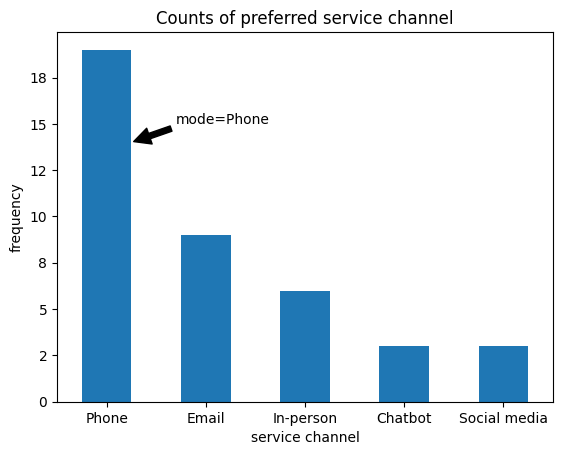

In [17]:
def plot_mode(dataframe:pd.DataFrame, column:str, title:str, xlabel:str) ->None:
    counts = dataframe[column].value_counts()

    # Plot the counts as a bar chart.
    ax = counts.plot.bar(rot=0)

    ax.set_title (f'Counts of {title}')
    ax.set_xlabel(xlabel)
    ax.set_ylabel ('frequency')

    # Format counts as integers.
    ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=0))

    # Find the mode so we can label it on the plot.
    mode = dataframe[column].mode()[0]

    # Find the index of the mode in the plot.
    mode_pos = counts.index.get_loc(mode)
    ax.annotate('mode={}'.format(mode), xy=(mode_pos + 0.25, 14),
                xytext=(mode_pos + 0.7, 15),
                arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.show ()

# test the function
plot_mode(
    dataframe = df_survey,
    column='preferred_channel',
    title = 'preferred service channel',
    xlabel='service channel')

##### Median

Applies to Ordinal, Interval and Ratio data.

reference: [Summary Statistics for Categorical Data](https://www.codecademy.com/learn/stats-summary-statistics-for-categorical-data/modules/stats-summary-statistics-for-categorical-data/cheatsheet)

In [18]:
def get_ordinal_median(dataframe:pd, column:str) -> str:
    """Get the text of the median value of an ordinal categorical column"""
    median_value = np.median(dataframe[column].cat.codes)
    median_text = dataframe[column].cat.categories[int(median_value)]

    return median_text

# test the fucntion
get_ordinal_median(df_survey, 'education')

'Bachelor Degree'